In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/Users/PREDTAOR/Downloads/diabetes_.csv")


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())
print("\nSummary Statistics:\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age    

In [9]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zeros:
    data[col] = data[col].replace(0, np.nan)

for col in columns_with_zeros:
    data[col] = data[col].fillna(data[col].mean())

print(data.isnull().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_count = int(len(X) * test_size)
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (538, 8)
X_test shape: (230, 8)
y_train shape: (538,)
y_test shape: (230,)


In [21]:
import numpy as np

def euclidean_distance(p1, p2):
    if p1.shape != p2.shape:
        raise ValueError("Points must have the same dimensions")
    
    return np.sqrt(np.sum((p1 - p2) ** 2))
p1 = np.array([1, 2, 3])
p2 = np.array([4, 5, 6])

dist = euclidean_distance(p1, p2)
print(dist)



5.196152422706632


In [25]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    return np.bincount(k_labels).argmax()
query = X_test[0]       
prediction = knn_predict_single(query, X_train, y_train, k=3)

print("Predicted label:", prediction)
print("Actual label:", y_test[0])


Predicted label: 0
Actual label: 0


In [38]:
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])
preds = knn_predict(X_test[:5], X_train, y_train, k=3)
print("Predictions:", preds)
print("Actual:", y_test[:5])


Predictions: [0 1 0 1 0]
Actual: [0 0 0 0 0]


In [28]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

In [29]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy (Original Data): {accuracy:.2f}%")

Accuracy (Original Data): 70.00%


In [31]:
def min_max_scaling(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


X_scaled = min_max_scaling(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

In [32]:
predictions_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, predictions_scaled)
print(f"Accuracy (Scaled Data): {accuracy_scaled:.2f}%")

Accuracy (Scaled Data): 71.30%


In [35]:
import time

def experiment_k(X_train, y_train, X_test, y_test, k_range):
    acc_list = []
    time_list = []

    for k in k_range:
        start = time.time()
        preds = knn_predict(X_test, X_train, y_train, k)
        elapsed = time.time() - start
        acc = compute_accuracy(y_test, preds)

        acc_list.append(acc)
        time_list.append(elapsed)

    return acc_list, time_list
k_values = range(1, 16)

acc_orig, time_orig = experiment_k(X_train, y_train, X_test, y_test, k_values)
acc_scaled, time_scaled = experiment_k(X_train_s, y_train_s, X_test_s, y_test_s, k_values)

print("Accuracy (original):", acc_orig)
print("Time (original):", time_orig)

print("Accuracy (scaled):", acc_scaled)
print("Time (scaled):", time_scaled)



Accuracy (original): [np.float64(67.82608695652173), np.float64(70.43478260869566), np.float64(70.0), np.float64(70.86956521739131), np.float64(67.3913043478261), np.float64(68.69565217391305), np.float64(68.26086956521739), np.float64(69.1304347826087), np.float64(69.1304347826087), np.float64(70.86956521739131), np.float64(70.86956521739131), np.float64(71.30434782608695), np.float64(71.30434782608695), np.float64(72.17391304347827), np.float64(73.47826086956522)]
Time (original): [1.0531842708587646, 1.0082929134368896, 1.0287127494812012, 1.0278332233428955, 1.0228033065795898, 1.128570795059204, 1.0343749523162842, 1.031324863433838, 1.0456018447875977, 1.0510711669921875, 1.0650618076324463, 1.062046766281128, 0.9870672225952148, 1.029827356338501, 1.0120575428009033]
Accuracy (scaled): [np.float64(66.08695652173913), np.float64(70.43478260869566), np.float64(71.30434782608695), np.float64(72.60869565217392), np.float64(71.30434782608695), np.float64(72.60869565217392), np.float6

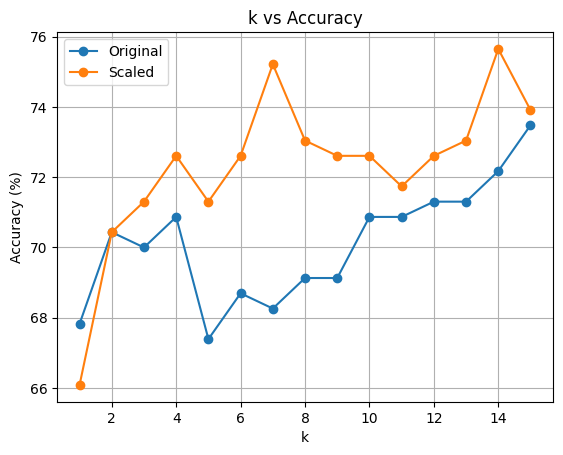

In [36]:
plt.figure()
plt.plot(k_values, acc_orig, marker='o', label='Original')
plt.plot(k_values, acc_scaled, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid()
plt.show()

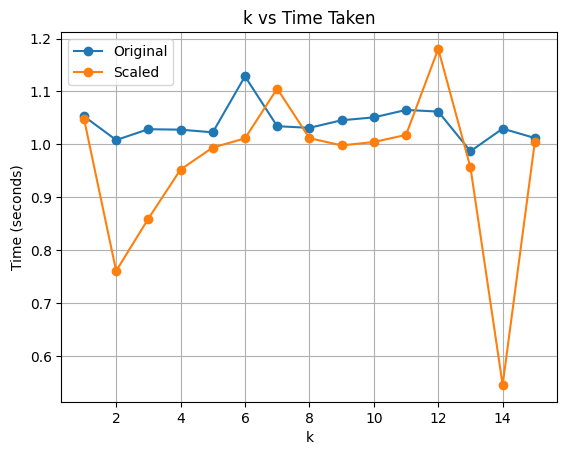

In [37]:
plt.figure()
plt.plot(k_values, time_orig, marker='o', label='Original')
plt.plot(k_values, time_scaled, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.grid()
plt.show()